In [1]:
using XGPaint
using Healpix
# using JLD2

## Load halos from HDF5 files
halo_pos, halo_mass = read_halo_catalog_hdf5(
    "/tigress/zequnl/xgpaint/websky_halos-light.hdf5");

┌ Info: Precompiling XGPaint [af630e4a-6754-4ec2-ab8a-f9f8b9ebafbf]
└ @ Base loading.jl:1273
  ** incremental compilation may be fatally broken for this module **



In [2]:
# establish a CIB model and cosmology
cosmo = get_cosmology(h=0.7f0, OmegaM=0.25f0)
radio_model = Radio_Sehgal2009{Float32}(a_0=-1.0)

@time begin
    sources = generate_sources(radio_model, cosmo, halo_pos, halo_mass);
end;

Culling halos below mass 1.0e13.
Allocating for 47424312 halos.
Populating HOD.
Drawing spectral coefficients.
Drawing from luminosity function.
Drawing for impact parameter.
 15.979509 seconds (105.95 M allocations: 9.578 GiB, 11.01% gc time)


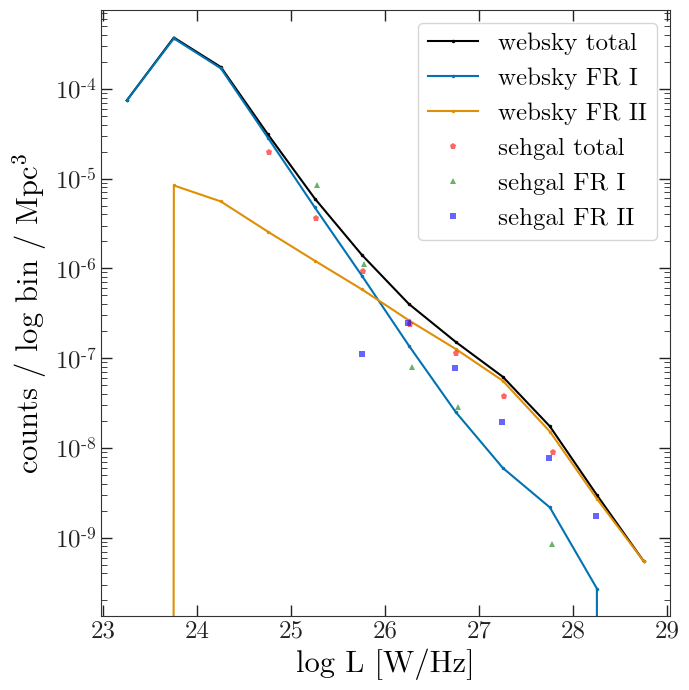

 16.090723 seconds (566.44 M allocations: 13.556 GiB, 54.90% gc time)


In [3]:
@time begin
m = Map{Float64,RingOrder}(radio_model.nside)
flux_I, flux_II, redshift_I, redshift_II = paint!(
    m, 151f6, radio_model, sources, return_fluxes=true)
end

using DelimitedFiles
using Unitful
using UnitfulAstro
using Cosmology
using PyPlot
using StatsBase

figure(figsize=(7,7))

sehgal_red = readdlm("../examples/data/sehgal_figure8_red.txt", ',', Float64, '\n')
sehgal_blue = readdlm("../examples/data/sehgal_figure8_blue.txt", ',', Float64, '\n')
sehgal_green = readdlm("../examples/data/sehgal_figure8_green.txt", ',', Float64, '\n')

vol = ustrip(u"Mpc^3",comoving_volume(cosmo, 0.3))
bins = (range(23, stop=29, step=0.5));
mids = (bins[2:end] .+ bins[1:end-1]) ./ 2.0
count_I = fit(Histogram, log10.(sources.L_I_151[redshift_I .< 0.3]), bins).weights

count_II = fit(Histogram, log10.(sources.L_II_151[redshift_II .< 0.3]), bins).weights

plot(mids, (count_I .+ count_II) ./ diff((bins)) ./ vol, label="websky total" )
plot(mids, count_I ./ diff((bins)) ./ vol, label="websky FR I" )
plot(mids, count_II ./ diff((bins)) ./ vol, label="websky FR II" )


plot(log10.(sehgal_red[:, 1]), sehgal_red[:, 2], "rp",
    label = "sehgal total", alpha = 0.6)
plot(log10.(sehgal_green[:, 1]), sehgal_green[:, 2], color = "green",
    "^", label = "sehgal FR I", alpha = 0.6)
plot(log10.(sehgal_blue[:, 1]), sehgal_blue[:, 2], color = "blue", "s",
    label = "sehgal FR II", alpha = 0.6)

ylabel("counts / log bin / Mpc\$^3\$")
xlabel("log L [W/Hz]")
yscale("log")

legend()
tight_layout()

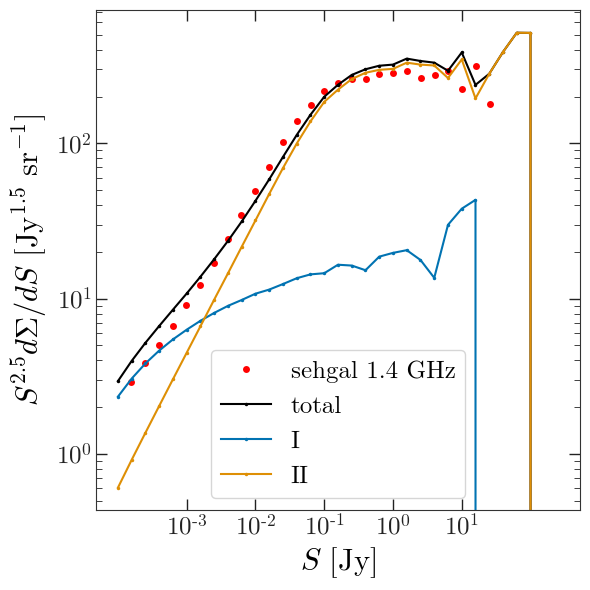

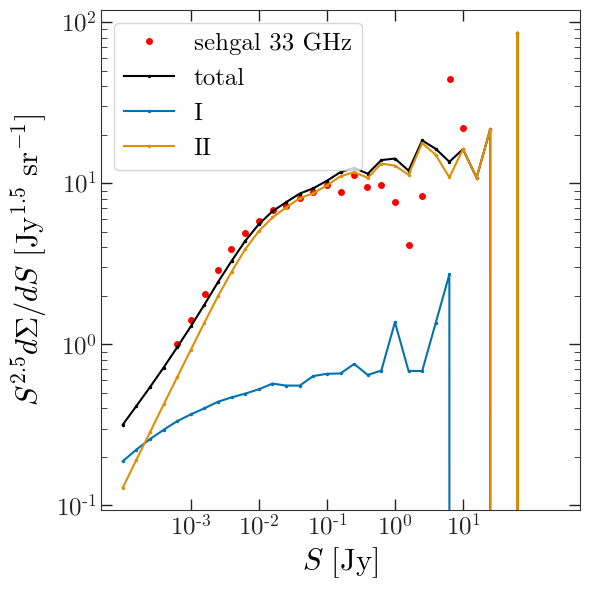

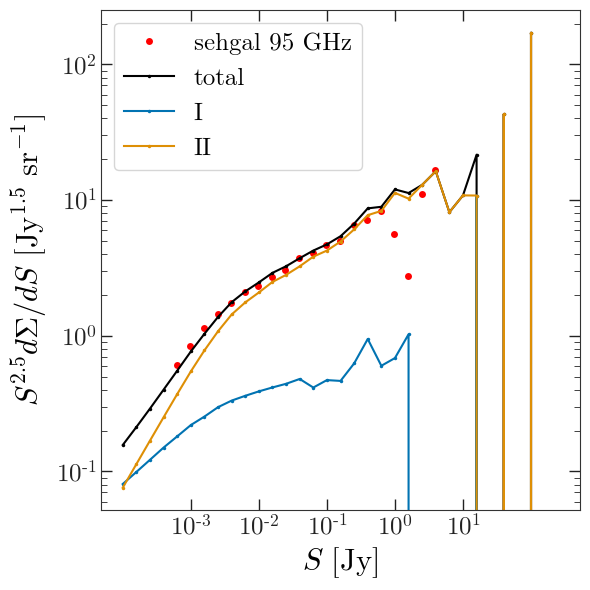

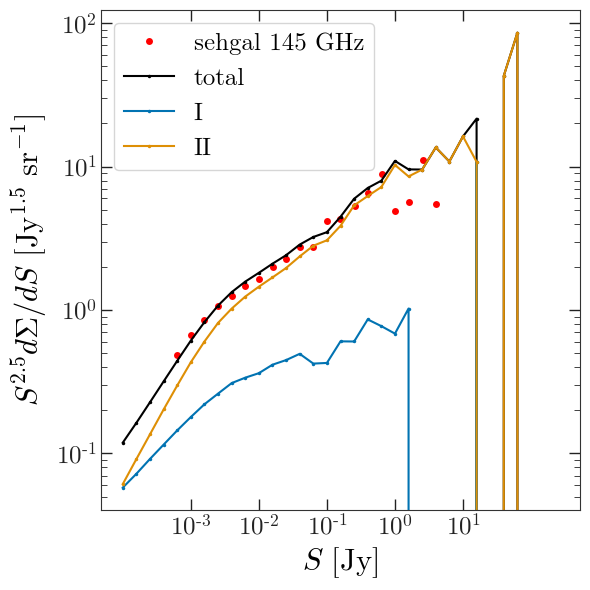

In [4]:
plt.figure(figsize=(6,6))

bins = (range(-4.1, stop=2.5, step=0.2));
mids = (bins[2:end] .+ bins[1:end-1]) ./ 2.0

flux_I, flux_II, redshift_I, redshift_II = paint!(
    m, 1.4f9, radio_model, sources, return_fluxes=true)
count_I = fit(Histogram, log10.(flux_I), bins).weights
count_II = fit(Histogram, log10.(flux_II), bins).weights

Sehgal = readdlm("../examples/data/sehgal_fig9_1.4GHz.txt", ',', Float64, '\n');
plot(Sehgal[:,1], Sehgal[:,2], "ro", label="sehgal 1.4 GHz")

plot(10 .^ mids, (count_I .+ count_II) .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "total")
plot(10 .^ mids, count_I .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "I")
plot(10 .^ mids, count_II .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "II")

yscale("log")
xscale("log")
xlabel("\$ S \$ [Jy]")
ylabel("\$ S^{2.5} d\\Sigma / dS \$ [Jy\$^{1.5}\$ sr\$^{-1}\$]")
xticks(10 .^ [-3.,-2.,-1.,0.,1.])
legend()
tight_layout()


##
plt.figure(figsize=(6,6))

bins = (range(-4.1, stop=2.5, step=0.2));
mids = (bins[2:end] .+ bins[1:end-1]) ./ 2.0

flux_I, flux_II, redshift_I, redshift_II = paint!(
    m, 33f9, radio_model, sources, return_fluxes=true)
count_I = fit(Histogram, log10.(flux_I), bins).weights
count_II = fit(Histogram, log10.(flux_II), bins).weights

Sehgal = readdlm("../examples/data/sehgal_fig9_33GHz.txt", ',', Float64, '\n');
plot(Sehgal[:,1], Sehgal[:,2], "ro", label="sehgal 33 GHz")

plot(10 .^ mids, (count_I .+ count_II) .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "total")
plot(10 .^ mids, count_I .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "I")
plot(10 .^ mids, count_II .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "II")

yscale("log")
xscale("log")
xlabel("\$ S \$ [Jy]")
ylabel("\$ S^{2.5} d\\Sigma / dS \$ [Jy\$^{1.5}\$ sr\$^{-1}\$]")
xticks(10 .^ [-3.,-2.,-1.,0.,1.])
legend()
tight_layout()


##
plt.figure(figsize=(6,6))

bins = (range(-4.1, stop=2.5, step=0.2));
mids = (bins[2:end] .+ bins[1:end-1]) ./ 2.0

flux_I, flux_II, redshift_I, redshift_II = paint!(
    m, 95f9, radio_model, sources, return_fluxes=true)
count_I = fit(Histogram, log10.(flux_I), bins).weights
count_II = fit(Histogram, log10.(flux_II), bins).weights

Sehgal = readdlm("../examples/data/sehgal_fig9_95GHz.txt", ',', Float64, '\n');
plot(Sehgal[:,1], Sehgal[:,2], "ro", label="sehgal 95 GHz")

plot(10 .^ mids, (count_I .+ count_II) .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "total")
plot(10 .^ mids, count_I .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "I")
plot(10 .^ mids, count_II .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "II")

yscale("log")
xscale("log")
xlabel("\$ S \$ [Jy]")
ylabel("\$ S^{2.5} d\\Sigma / dS \$ [Jy\$^{1.5}\$ sr\$^{-1}\$]")
xticks(10 .^ [-3.,-2.,-1.,0.,1.])
legend()
tight_layout()


##
plt.figure(figsize=(6,6))

bins = (range(-4.1, stop=2.5, step=0.2));
mids = (bins[2:end] .+ bins[1:end-1]) ./ 2.0

flux_I, flux_II, redshift_I, redshift_II = paint!(
    m, 145f9, radio_model, sources, return_fluxes=true)
count_I = fit(Histogram, log10.(flux_I), bins).weights
count_II = fit(Histogram, log10.(flux_II), bins).weights

Sehgal = readdlm("../examples/data/sehgal_fig9_145GHz.txt", ',', Float64, '\n');
plot(Sehgal[:,1], Sehgal[:,2], "ro", label="sehgal 145 GHz")

plot(10 .^ mids, (count_I .+ count_II) .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "total")
plot(10 .^ mids, count_I .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "I")
plot(10 .^ mids, count_II .* (10 .^ mids) .^ 2.5 ./ diff(10 .^ bins) / (4π), label = "II")

yscale("log")
xscale("log")
xlabel("\$ S \$ [Jy]")
ylabel("\$ S^{2.5} d\\Sigma / dS \$ [Jy\$^{1.5}\$ sr\$^{-1}\$]")
xticks(10 .^ [-3.,-2.,-1.,0.,1.])
legend()
tight_layout()
